In [1]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import git
import os, sys

path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(os.path.join(path_git, 'utils'))
from functions import *

os.chdir(path_git)


2024-12-05 00:02:48.373009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# El análisis preliminar

In [2]:
# Parámetros de la simulación

# choose a number of time steps
look_back = 14

# Cantidad de valores por cada paso temporal
n_features = 1

# Cantidad de pasos que queremos predecir hacia adelante
window_size = 100

# longitud de la cadena izquierda
len_left_chain = 320

# longitud de la cadena derecha
len_right_chain = 180

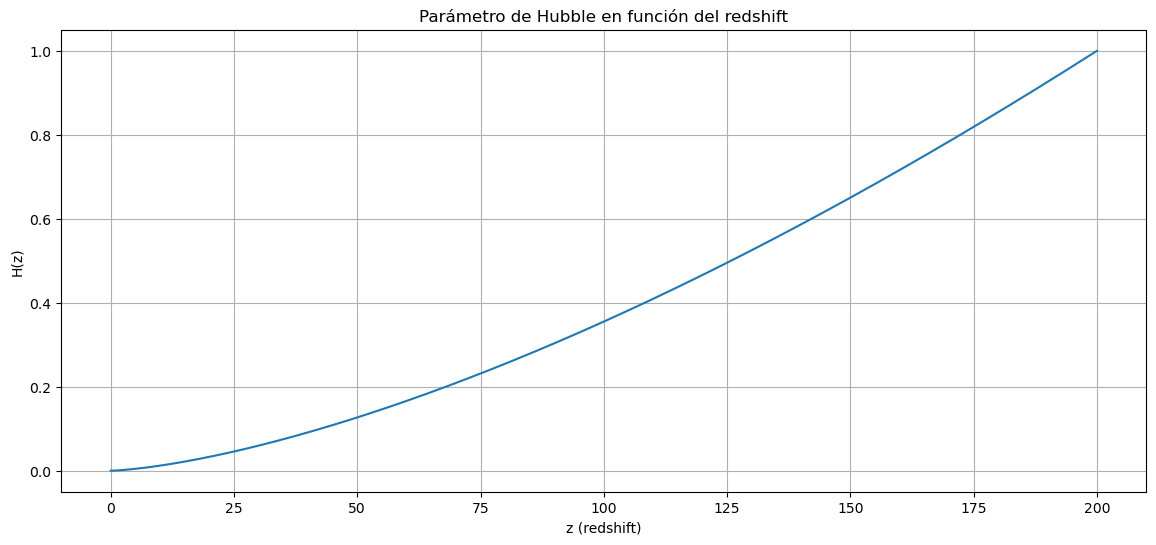

In [15]:
# Generamos la señal temporal

# Time step and number of steps
dt = 0.1
num_steps = 2000

#Vector de tiempos
t = np.linspace(0,dt*num_steps,num_steps)

# Generamos la señal temporal
Omega_r = 1e-5
Omega_m = 0.3
Omega_l = 0.7
raw_seq = np.sqrt(Omega_r * (1+t)**4 + Omega_m * (1+t)**3 + Omega_l)

# Maximo de la señal para normalizar
maximo = np.max(np.abs(raw_seq))
# Normalizamos
raw_seq = raw_seq/maximo

# Graficar la señal temporal
plt.figure(figsize=(14, 6))
plt.plot(t, raw_seq)
plt.xlabel('z (redshift)')
plt.ylabel('H(z)')
plt.title('Parámetro de Hubble en función del redshift')
plt.grid(True)
plt.show()

Tamaños de la secuencia izquierda: 320,320
Tamaños de la secuencia derecha: 180,180
Tamaños de la ventana: 100,100


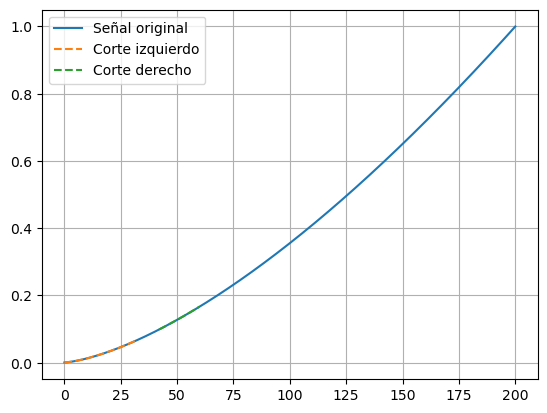

In [4]:
i_inicial = 0
raw_seq_1 = raw_seq[i_inicial:i_inicial+len_left_chain]
t_1 = t[i_inicial:i_inicial+len_left_chain]

print(f'Tamaños de la secuencia izquierda: {len(raw_seq_1)},{len_left_chain}')

raw_seq_2 = raw_seq[i_inicial+len_left_chain+window_size:i_inicial+len_left_chain+window_size + len_right_chain]
t_2 = t[i_inicial+len_left_chain+window_size:i_inicial+len_left_chain+window_size + len_right_chain]

raw_seq_2_bw = raw_seq_2[::-1]
t_2_bw = t_2[::-1]

print(f'Tamaños de la secuencia derecha: {len(raw_seq_2)},{len_right_chain}')

t_window = t[i_inicial+len_left_chain:i_inicial+len_left_chain+window_size]
raw_seq_window = raw_seq[i_inicial+len_left_chain:i_inicial+len_left_chain+window_size]
print(f'Tamaños de la ventana: {len(raw_seq_window)},{window_size}')

plt.plot(t,raw_seq, label='Señal original')
plt.plot(t_1,raw_seq_1, '--', label='Corte izquierdo')
plt.plot(t_2,raw_seq_2, '--', label='Corte derecho')
plt.grid()
plt.legend()
plt.show()

In [5]:
print('t_1 limits:',t_1[0],t_1[-1])
print('t_window limits:', t_window[0],t_window[-1])
print('t_2 limits:',t_2[0],t_2[-1])
print('t limits:',t[0],t[-1])
print('len of times:', len(t_1),len(t_window),len(t_2),len(t))

t_1 limits: 0.0 31.915957978989493
t_window limits: 32.016008004001996 41.92096048024012
t_2 limits: 42.021010505252626 59.92996498249124
t limits: 0.0 200.0
len of times: 320 100 180 2000


In [6]:
predicciones_adelante_1,valores_reales_1 = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window)
diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

predicciones_adelante_2_bw,valores_reales_2_bw = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1])
predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
valores_reales_2 = valores_reales_2_bw[::-1]

diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)

2024-12-05 00:02:50.799012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 24ms/step


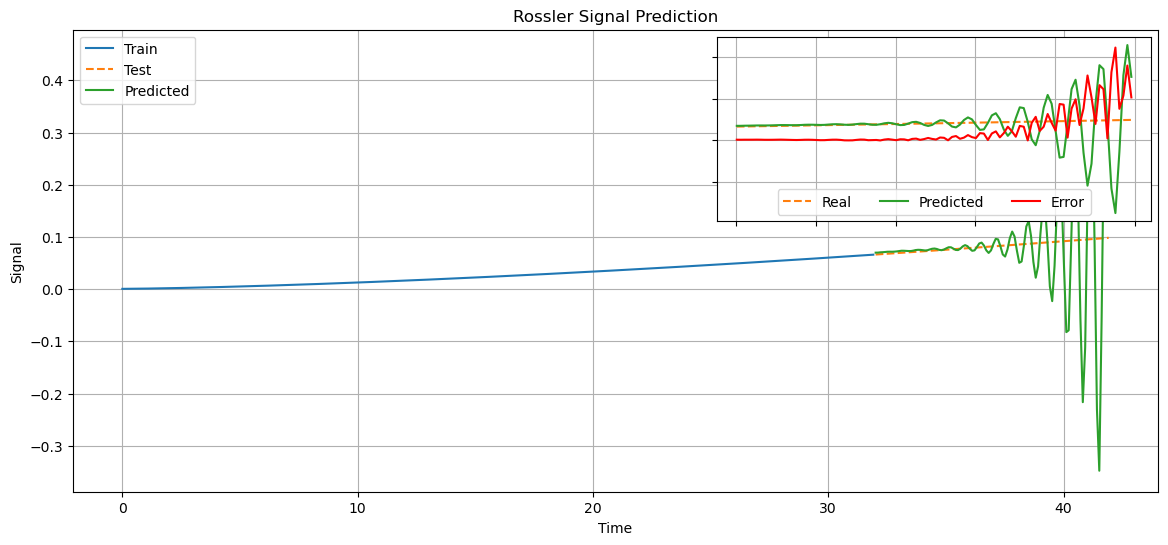

In [7]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(t_1,raw_seq_1,label='Train')
ax.plot(t_window,raw_seq_window,'--',label='Test')
ax.plot(t_window,predicciones_adelante_1,label='Predicted')
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Rossler Signal Prediction')
ax.legend(loc = 'upper left')

axin = inset_axes(ax, width = "40%", height = "40%", loc = 'upper right')

axin.plot(t_window,raw_seq_window, '--',label = 'Real', color = 'C1')
axin.plot(t_window,predicciones_adelante_1, label = 'Predicted', color = 'C2')
axin.plot(t_window,diferencia_1, label = 'Error', color = 'red')
axin.set_xticklabels([])
axin.set_yticklabels([])
axin.grid(True)
axin.legend(ncol = 3, loc = 'lower center')


plt.show()

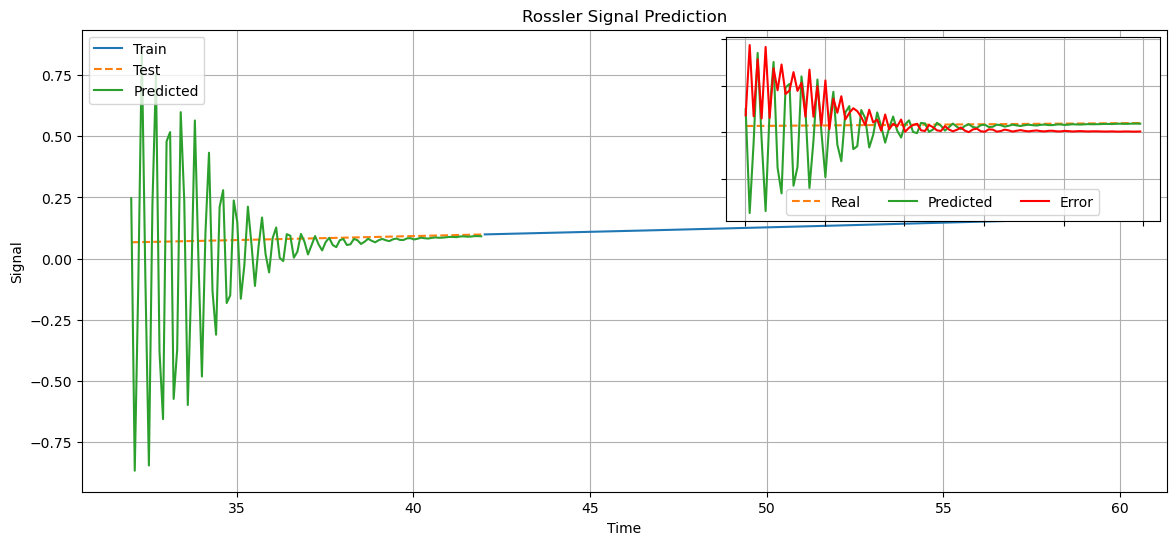

In [8]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(t_2,raw_seq_2,label='Train')
ax.plot(t_window,raw_seq_window,'--',label='Test')
ax.plot(t_window,predicciones_adelante_2,label='Predicted')
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Rossler Signal Prediction')
ax.legend(loc = 'upper left')

axin = inset_axes(ax, width = "40%", height = "40%", loc = 'upper right')

axin.plot(t_window,raw_seq_window, '--',label = 'Real', color = 'C1')
axin.plot(t_window,predicciones_adelante_2, label = 'Predicted', color = 'C2')
axin.plot(t_window,diferencia_2, label = 'Error', color = 'red')
axin.set_xticklabels([])
axin.set_yticklabels([])
axin.grid(True)
axin.legend(ncol = 3, loc = 'lower center')


plt.show()


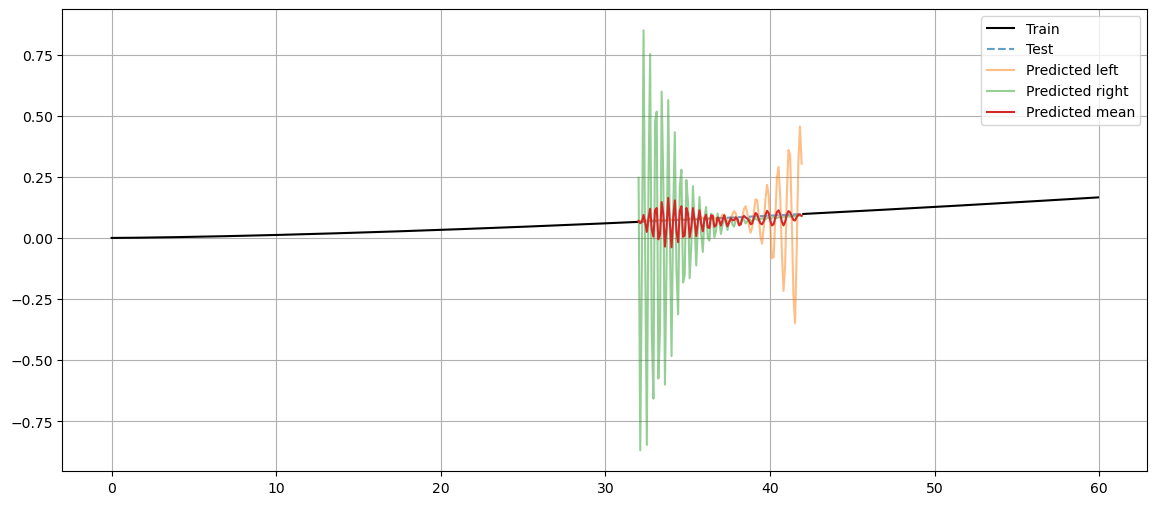

In [9]:
prediction_mean = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)


fig, ax = plt.subplots(figsize = (14,6))
ax.plot(t_1,raw_seq_1,'k',label='Train')
ax.plot(t_window,valores_reales_1,'--',label='Test', alpha = 0.7)
ax.plot(t_window,predicciones_adelante_1,label='Predicted left', alpha = 0.5)
ax.plot(t_2,raw_seq_2,'k')
ax.plot(t_window,predicciones_adelante_2,label='Predicted right', alpha = .5)
ax.plot(t_window,prediction_mean,label='Predicted mean')
ax.grid()
ax.legend()
plt.show()

# Jugando un poco más
Hasta ahora, sólo trabajamos con un modelo de la siguiente pinta:
```
model = Sequential()
model.add(SimpleRNN(20, activation='tanh', input_shape=(look_back, n_features)))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='mse')
```

Ahora bien, teniendo en cuenta que en este caso tenemos dos dinámicas temporales (una asociada a la periodicidad semanal y otra a la del avance de la enfermedad), podríamos tratar de utilizar una capa LSTM en cambio de la RNN para poder captar esta variación.

In [10]:
model = Sequential()
model.add(LSTM(32, activation='tanh',input_shape=(look_back, n_features)))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer='adam', loss='mse')


predicciones_adelante_1,valores_reales_1 = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window, model = model)
diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

predicciones_adelante_2_bw,valores_reales_2_bw = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1], model = model)
predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
valores_reales_2 = valores_reales_2_bw[::-1]

diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)

prediction_mean = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)

INFO:tensorflow:Assets written to: ram://c22c7285-c9f4-447a-9196-e7dcf2ed8902/assets


INFO:tensorflow:Assets written to: ram://c22c7285-c9f4-447a-9196-e7dcf2ed8902/assets


1/1 [==============================] - 0s 32ms/step


INFO:tensorflow:Assets written to: ram://43485aeb-b201-49fd-afad-40110fbd3929/assets


INFO:tensorflow:Assets written to: ram://43485aeb-b201-49fd-afad-40110fbd3929/assets


1/1 [==============================] - 0s 25ms/step


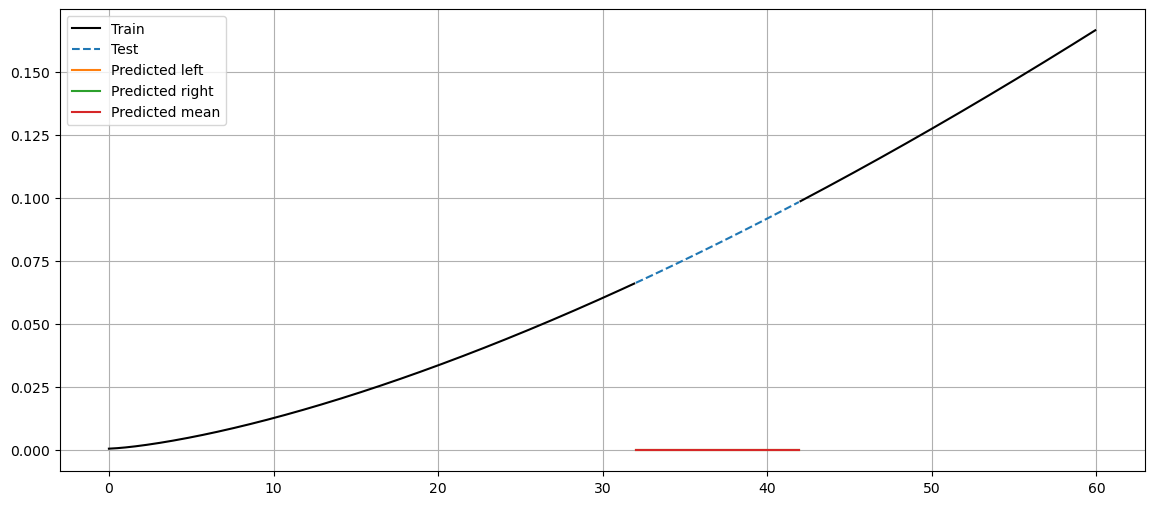

In [11]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(t_1,raw_seq_1,'k',label='Train')
ax.plot(t_window,valores_reales_1,'--',label='Test')
ax.plot(t_window,predicciones_adelante_1,label='Predicted left')
ax.plot(t_2,raw_seq_2,'k')
ax.plot(t_window,predicciones_adelante_2,label='Predicted right')
ax.plot(t_window,prediction_mean,label='Predicted mean')
ax.grid()
ax.legend()
plt.show()

# Análisis sistemático
En vez de ir probando, sistematicemos un poco la comparación para distintos sets de parámetros y valores de las ventanas y datos.

In [12]:
look_back = 14
n_features = 1
window_size = 100
len_left_chain = 320
len_right_chain = 180
i_inicial = 0
iterations = 10

raw_seq_1 = raw_seq[i_inicial:i_inicial+len_left_chain]
t_1 = t[i_inicial:i_inicial+len_left_chain]
raw_seq_2 = raw_seq[i_inicial+len_left_chain+window_size:i_inicial+len_left_chain+window_size + len_right_chain]
t_2 = t[i_inicial+len_left_chain+window_size:i_inicial+len_left_chain+window_size + len_right_chain]
raw_seq_2_bw = raw_seq_2[::-1]
t_2_bw = t_2[::-1]
t_window = t[i_inicial+len_left_chain:i_inicial+len_left_chain+window_size]
raw_seq_window = raw_seq[i_inicial+len_left_chain:i_inicial+len_left_chain+window_size]


mod = 'RNN'

prediction_mean_weighted = np.zeros((window_size, iterations))

for i in range(iterations):
    predicciones_adelante_1, _ = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window,)
    #diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

    # split into samples
    predicciones_adelante_2_bw, _ = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1], )
    predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
    #valores_reales_2 = valores_reales_2_bw[::-1]

    # Calculamos el error
    #diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)
    prediction_mean_weighted[:,i] = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)
np.save(f'saved_iterations/prediction_mean_weightedCOSMO_{mod}.npy', prediction_mean_weighted)



iterations = 10
mod = 'LSTM'
model = Sequential()
model.add(LSTM(32, activation='tanh',input_shape=(look_back, n_features)))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer='adam', loss='mse')

prediction_mean_weighted = np.zeros((window_size, iterations))

for i in range(iterations):
    predicciones_adelante_1, _ = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window, model = model)
    #diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

    # split into samples
    predicciones_adelante_2_bw, _ = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1], model = model)
    predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
    #valores_reales_2 = valores_reales_2_bw[::-1]

    # Calculamos el error
    #diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)
    prediction_mean_weighted[:,i] = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)
np.save(f'saved_iterations/prediction_mean_weightedCOSMO_{mod}.npy', prediction_mean_weighted)

mod = 'BidirectionalLSTM'
model = Sequential()
model.add(Bidirectional(LSTM(32, activation='tanh',input_shape=(look_back, n_features))))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer='adam', loss='mse')

prediction_mean_weighted = np.zeros((window_size, iterations))

for i in range(iterations):
    predicciones_adelante_1, _ = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window, model = model)
    #diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

    # split into samples
    predicciones_adelante_2_bw, _ = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1], model = model)
    predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
    #valores_reales_2 = valores_reales_2_bw[::-1]

    # Calculamos el error
    #diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)
    prediction_mean_weighted[:,i] = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)
np.save(f'saved_iterations/prediction_mean_weightedCOSMO_{mod}.npy', prediction_mean_weighted)

mod = 'BidirectionalStackedLSTM'
model = Sequential()
model.add(Bidirectional(LSTM(32, activation='tanh',input_shape=(look_back, n_features), return_sequences=True)))
model.add(Bidirectional(LSTM(64, activation='tanh',input_shape=(look_back, n_features))))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer='adam', loss='mse')

prediction_mean_weighted = np.zeros((window_size, iterations))

for i in range(iterations):
    predicciones_adelante_1, _ = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window, model = model)
    #diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

    # split into samples
    predicciones_adelante_2_bw, _ = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1], model = model)
    predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
    #valores_reales_2 = valores_reales_2_bw[::-1]

    # Calculamos el error
    #diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)
    prediction_mean_weighted[:,i] = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)
np.save(f'saved_iterations/prediction_mean_weightedCOSMO_{mod}.npy', prediction_mean_weighted)

1/1 [==============================] - 0s 22ms/step


INFO:tensorflow:Assets written to: ram://481fb428-0167-4497-b91d-74174fdf16d0/assets


INFO:tensorflow:Assets written to: ram://481fb428-0167-4497-b91d-74174fdf16d0/assets


1/1 [==============================] - 0s 25ms/step


INFO:tensorflow:Assets written to: ram://5f0881c7-db22-4187-8118-712b00fea958/assets


INFO:tensorflow:Assets written to: ram://5f0881c7-db22-4187-8118-712b00fea958/assets


1/1 [==============================] - 0s 22ms/step


INFO:tensorflow:Assets written to: ram://ca54285a-88e3-4d3d-9791-33b28b7b8436/assets


INFO:tensorflow:Assets written to: ram://ca54285a-88e3-4d3d-9791-33b28b7b8436/assets


1/1 [==============================] - 0s 23ms/step


INFO:tensorflow:Assets written to: ram://7cbda057-77fb-40c5-9e31-5d22bad3bb1c/assets


INFO:tensorflow:Assets written to: ram://7cbda057-77fb-40c5-9e31-5d22bad3bb1c/assets


1/1 [==============================] - 0s 27ms/step


INFO:tensorflow:Assets written to: ram://85206e6c-f8d8-4702-af00-5565e2195460/assets


INFO:tensorflow:Assets written to: ram://85206e6c-f8d8-4702-af00-5565e2195460/assets


1/1 [==============================] - 0s 25ms/step


INFO:tensorflow:Assets written to: ram://d8abde81-ef2d-4dbc-a253-7e29dbf4b765/assets


INFO:tensorflow:Assets written to: ram://d8abde81-ef2d-4dbc-a253-7e29dbf4b765/assets


1/1 [==============================] - 0s 23ms/step


INFO:tensorflow:Assets written to: ram://13c398cf-ece5-40a3-becb-74424fa5ca7a/assets


INFO:tensorflow:Assets written to: ram://13c398cf-ece5-40a3-becb-74424fa5ca7a/assets


1/1 [==============================] - 0s 23ms/step


INFO:tensorflow:Assets written to: ram://eed93a94-c385-4d52-9da9-7d91d2d41b21/assets


INFO:tensorflow:Assets written to: ram://eed93a94-c385-4d52-9da9-7d91d2d41b21/assets


1/1 [==============================] - 0s 22ms/step


INFO:tensorflow:Assets written to: ram://6cf77e64-b8ab-452a-800f-1d7470580891/assets


INFO:tensorflow:Assets written to: ram://6cf77e64-b8ab-452a-800f-1d7470580891/assets


1/1 [==============================] - 0s 28ms/step


INFO:tensorflow:Assets written to: ram://b9990e1d-05c4-45f7-a0aa-79a491fbb6cc/assets


INFO:tensorflow:Assets written to: ram://b9990e1d-05c4-45f7-a0aa-79a491fbb6cc/assets


1/1 [==============================] - 0s 20ms/step


INFO:tensorflow:Assets written to: ram://d85d54cb-8de4-4591-9d28-6928ca94973e/assets


INFO:tensorflow:Assets written to: ram://d85d54cb-8de4-4591-9d28-6928ca94973e/assets


1/1 [==============================] - 0s 21ms/step


INFO:tensorflow:Assets written to: ram://404121e8-387d-46ae-aa81-a5c8c601a37d/assets


INFO:tensorflow:Assets written to: ram://404121e8-387d-46ae-aa81-a5c8c601a37d/assets


1/1 [==============================] - 0s 19ms/step


INFO:tensorflow:Assets written to: ram://d542defa-4e66-4e69-9e02-09adf674e5b7/assets


INFO:tensorflow:Assets written to: ram://d542defa-4e66-4e69-9e02-09adf674e5b7/assets


1/1 [==============================] - 0s 26ms/step


INFO:tensorflow:Assets written to: ram://df92d84b-688d-4725-9f13-d4bfb63caf31/assets


INFO:tensorflow:Assets written to: ram://df92d84b-688d-4725-9f13-d4bfb63caf31/assets


1/1 [==============================] - 0s 21ms/step


INFO:tensorflow:Assets written to: ram://cfc389dd-8c5a-4e8b-8e26-a60e1e192aa6/assets


INFO:tensorflow:Assets written to: ram://cfc389dd-8c5a-4e8b-8e26-a60e1e192aa6/assets


1/1 [==============================] - 0s 31ms/step


INFO:tensorflow:Assets written to: ram://a5d406f6-bd34-484a-94e3-4581554054d2/assets


INFO:tensorflow:Assets written to: ram://a5d406f6-bd34-484a-94e3-4581554054d2/assets


1/1 [==============================] - 0s 26ms/step


INFO:tensorflow:Assets written to: ram://52a5a172-d4ed-4a66-8c8d-25d19334efd7/assets


INFO:tensorflow:Assets written to: ram://52a5a172-d4ed-4a66-8c8d-25d19334efd7/assets


1/1 [==============================] - 0s 29ms/step


INFO:tensorflow:Assets written to: ram://3b6f94d7-555c-4e5d-83b4-c512f171b01b/assets


INFO:tensorflow:Assets written to: ram://3b6f94d7-555c-4e5d-83b4-c512f171b01b/assets


1/1 [==============================] - 0s 23ms/step


INFO:tensorflow:Assets written to: ram://24e64dc8-8e94-48af-ac11-a75ebdf7e93e/assets


INFO:tensorflow:Assets written to: ram://24e64dc8-8e94-48af-ac11-a75ebdf7e93e/assets


1/1 [==============================] - 0s 23ms/step


INFO:tensorflow:Assets written to: ram://010eda89-20f2-4f76-9c79-35da080c8542/assets


INFO:tensorflow:Assets written to: ram://010eda89-20f2-4f76-9c79-35da080c8542/assets


1/1 [==============================] - 0s 16ms/step


Text(0.5, 0.98, '$1-\\sigma$ Error Plot of Signal Predictions')

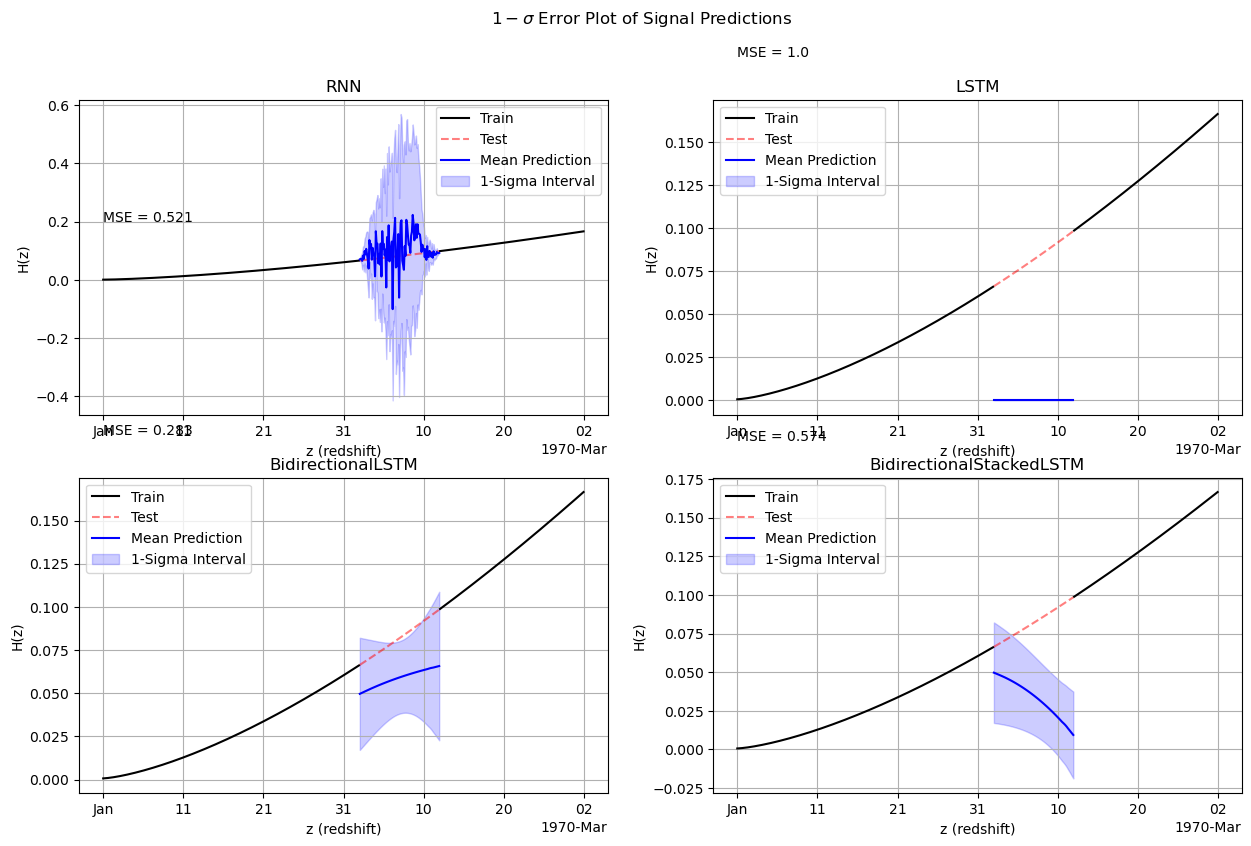

In [17]:
import matplotlib.dates as mdates
mods = ['RNN', 'LSTM', 'BidirectionalLSTM', 'BidirectionalStackedLSTM']

fig, axs = plt.subplots(2,2, figsize = (15, 9))

for m, ax in zip(mods, fig.get_axes()):
    
    output = np.load(f'saved_iterations/prediction_mean_weightedCOSMO_{m}.npy')
    num_steps = output.shape[0]
    dt = 1
    t = np.linspace(0, num_steps * dt, num_steps)

    # Calculate the mean and standard deviation of the predictions
    mean_prediction = np.mean(output, axis=1)
    std_prediction = np.std(output, axis=1)


    ax.plot(t_1, raw_seq_1, 'k', label='Train')
    ax.plot(t_2, raw_seq_2, 'k')
    ax.plot(t_window, raw_seq_window, '--r', label='Test', alpha=0.5)

    # Plot the mean prediction
    ax.plot(t_window, mean_prediction, 'b', label='Mean Prediction')

    # Plot the 1-sigma confidence interval
    ax.fill_between(t_window, mean_prediction - std_prediction, mean_prediction + std_prediction, color='blue', alpha=0.2, label='1-Sigma Interval')

    # Add grid, legend, and labels
    ax.grid()
    ax.legend()
    ax.set_xlabel('z (redshift)')
    ax.set_ylabel('H(z)')
    ax.set_title(f'{m}')
    mse = MSE(raw_seq_window, output)
    ax.text(t_1[0], 0.2, f'MSE = {round(mse,3)}')

    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))


    

fig.suptitle(r'$1-\sigma$ Error Plot of Signal Predictions')
